<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
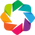

In [23]:
import glob
import os


# Reminder to install s3fs to read files from aws
import s3fs

import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import seaborn as sns

import scanpy.api as sc

import holoviews as hv
hv.extension('bokeh')
# hv.archive.auto()

%matplotlib inline

In [24]:
! aws s3 ls s3://olgabot-maca/facs/sourmash_compare/ > aws_s3_ls_tabula_muris_compare.txt

In [25]:
aws_s3_ls = pd.read_table('aws_s3_ls_tabula_muris_compare.txt', 
                          delim_whitespace=True, header=None, 
                          names=['date', 'time', 'bytes', 'basename'])
print(aws_s3_ls.shape)
aws_s3_ls.head()

(1039, 4)


,date,time,bytes,basename
0,2018-09-14,22:08:28,19045449,trim=false_scaled=1000_dna_ksize=12.csv
1,2018-08-10,11:01:24,19395540,trim=false_scaled=1000_dna_ksize=15.csv
2,2018-09-14,22:01:01,20133019,trim=false_scaled=1000_dna_ksize=18.csv
3,2018-09-12,23:40:02,10499576,trim=false_scaled=1000_dna_ksize=21.csv
4,2018-09-15,05:15:04,20258815,trim=false_scaled=1000_dna_ksize=24.csv


In [26]:
sorted(aws_s3_ls.date.unique())

['2018-08-09',
 '2018-08-10',
 '2018-08-11',
 '2018-08-12',
 '2018-09-12',
 '2018-09-13',
 '2018-09-14',
 '2018-09-15',
 '2018-09-16',
 '2018-09-18',
 '2018-09-19']

In [27]:
prefix = 's3://olgabot-maca/facs/sourmash_compare/'

In [28]:
df = pd.read_csv(prefix + aws_s3_ls.query('date == "2018-08-12"').iloc[0]['basename'])
df.iloc[:5, :5]

,N9-B002428-3_38_F-1-1|tissue:Heart|subtissue:LA|cell_ontology_class:fibroblast|free_annotation:NA,E5-D042479-3_8_M-1-1|tissue:Marrow|subtissue:B-cells|cell_ontology_class:precursor_B_cell|free_annotation:pre-B_cell_(Philadelphia_nomenclature),L1-D042475-3_9_M-1-1|tissue:Trachea|subtissue:NA|cell_ontology_class:mesenchymal_cell|free_annotation:NA,P12-MAA000596-3_9_M-1-1|tissue:Marrow|subtissue:KLS|cell_ontology_class:hematopoietic_precursor_cell|free_annotation:NA,I10-MAA000385-3_10_M-1-1|tissue:Fat|subtissue:SCAT|cell_ontology_class:myeloid_cell|free_annotation:NA
0,1.000000,0.455388,0.738791,0.609054,0.497532
1,0.455388,1.000000,0.542118,0.556670,0.519706
2,0.738791,0.542118,0.999999,0.731973,0.588434
3,0.609054,0.556670,0.731973,1.000000,0.647301
4,0.497532,0.519706,0.588434,0.647301,1.000000


In [29]:
df = pd.read_csv(prefix + aws_s3_ls.query('date == "2018-09-12"').iloc[0]['basename'])
df.iloc[:5, :5]

,G12-MAA000496-3_10_M-1-1|tissue:Trachea|subtissue:NA|cell_ontology_class:mesenchymal_cell|free_annotation:NA,F12-D045140-3_38_F-1-1|tissue:Marrow|subtissue:Granulocytes|cell_ontology_class:granulocyte|free_annotation:NA,N9-MAA000617-3_10_M-1-1|tissue:Brain_Myeloid|subtissue:Striatum|cell_ontology_class:microglial_cell|free_annotation:NA,F20-MAA000934-3_9_M-1-1|tissue:Fat|subtissue:SCAT|cell_ontology_class:mesenchymal_stem_cell_of_adipose|free_annotation:mesenchymal_progenitor,A8-MAA000609-3_8_M-1-1|tissue:Thymus|subtissue:NA|cell_ontology_class:immature_T_cell|free_annotation:DN4-DP_in_transition_Cd69_negative_thymocytes
0,1.000000,0.027854,0.044296,0.081313,0.040397
1,0.027854,1.000000,0.028868,0.030979,0.023340
2,0.044296,0.028868,1.000000,0.054794,0.036477
3,0.081313,0.030979,0.054794,1.000000,0.035593
4,0.040397,0.023340,0.036477,0.035593,1.000000


In [30]:
df = pd.read_csv(prefix + aws_s3_ls.query('date == "2018-09-15"').iloc[0]['basename'])
df.iloc[:5, :5]

,M20-B002775-3_39_F-1-1|tissue:Kidney|subtissue:NA|cell_ontology_class:epithelial_cell_of_proximal_tubule|free_annotation:NA,N9-B002011-3_38_F-1-1|tissue:Heart|subtissue:RA|cell_ontology_class:fibroblast|free_annotation:NA,L17-B002423-3_39_F-1-1|tissue:Heart|subtissue:RV|cell_ontology_class:fibroblast|free_annotation:NA,N16-MAA001539-3_56_F-1-1|tissue:Large_Intestine|subtissue:Distal|cell_ontology_class:enterocyte_of_epithelium_of_large_intestine|free_annotation:Enterocyte_(Distal),B21-D042474-3_8_M-1-1|tissue:Trachea|subtissue:NA|cell_ontology_class:endothelial_cell|free_annotation:NA
0,1.000000,0.030867,0.041741,0.026250,0.029224
1,0.030867,1.000000,0.059843,0.020217,0.043646
2,0.041741,0.059843,1.000000,0.027921,0.046250
3,0.026250,0.020217,0.027921,1.000000,0.021005
4,0.029224,0.043646,0.046250,0.021005,1.000000


In [31]:
df = pd.read_csv(prefix + aws_s3_ls.query('date == "2018-09-16"').iloc[0]['basename'])
df.iloc[:5, :5]

,E7-MAA100037-3_11_M-1-1|tissue:Heart|subtissue:Unknown|cell_ontology_class:endothelial_cell|free_annotation:NA,G21-MAA000409-3_10_M-1-1|tissue:Marrow|subtissue:Granulocytes|cell_ontology_class:granulocyte|free_annotation:NA,C17-MAA001871-3_39_F-1-1|tissue:Large_Intestine|subtissue:Proximal|cell_ontology_class:enterocyte_of_epithelium_of_large_intestine|free_annotation:Enterocyte_(Proximal),P17-MAA001539-3_56_F-1-1|tissue:Large_Intestine|subtissue:Distal|cell_ontology_class:large_intestine_goblet_cell|free_annotation:Goblet_cell_(Distal),O3-MAA000907-3_11_M-1-1|tissue:Liver|subtissue:Non-hepatocytes|cell_ontology_class:Kupffer_cell|free_annotation:NA
0,1.000000,0.424346,0.486285,0.472445,0.315809
1,0.424346,1.000000,0.488987,0.493873,0.319717
2,0.486285,0.488987,1.000000,0.596803,0.328563
3,0.472445,0.493873,0.596803,1.000000,0.327317
4,0.315809,0.319717,0.328563,0.327317,1.000000


CSVs created from 2018-09-12 to 2018-09-15 are all with the `--ignore-abundance` flag

In [ ]:

def extract_cell_metadata(columns):
    cell_metadata = pd.Series(columns).str.split('|', expand=True)
#     cell_metadata.index = columns
    cell_metadata.columns = ['cell_id', 'tissue', 
                             'subtissue', 'cell_ontology_class', 
                             'free_annotation']
    cell_metadata = cell_metadata.set_index('cell_id')
    cell_metadata.index.name = 'cell_id'
    cell_metadata = cell_metadata.applymap(lambda x: x.split(':')[-1])
    print('\tcell_metadata.shape', cell_metadata.shape)
#     cell_metadata = cell_metadata.sort_index()
#     cell_metadata.head()
    return cell_metadata



dfs = {}

metadatas = []

def to_key_value_pair(attribute):
    if len(attribute) > 1:
        try:
            return attribute[0], int(attribute[1])
        except ValueError:
            return attribute[0], attribute[1] 
    else:
        return 'comparison_sequence', attribute[0]



def extract_experiment_metadata(basename):
    key = basename.split('.csv')[0]
    split = key.split('_')
    attributes = [x.split('=') for x in split]
    attributes = dict(to_key_value_pair(x) for x in attributes)
    return key, attributes


ignore_abundance_dates = ['2018-09-12',
 '2018-09-13',
 '2018-09-14',
 '2018-09-15']

experiment_metadatas = {}

cell_metadata = pd.DataFrame()

max_cells = 1000
tidy_dfs = []

for i, row in aws_s3_ls.iterrows():
    basename = row['basename']
    csv = f'{prefix}{basename}'
    df = pd.read_csv(csv)
    print(f'{basename}\tdf.shape: {df.shape}')
    
    key, attributes = extract_experiment_metadata(basename)
    experiment_metadatas[key] = attributes

    metadata = extract_cell_metadata(df.columns)
    
    mask = np.triu(np.ones(df.shape)).astype(np.bool)

    df.index = metadata.index.copy()
    df.columns = metadata.index.copy()
    
    df = df.where(mask)
    df.index.name = 'cell_id'
    df.columns.name = 'other_cell'
    tidy = df.stack().reset_index()
    tidy['experiment'] = key
    
    ignore_abundance = row['date'] in ignore_abundance_dates
    tidy['ignore_abundance'] = ignore_abundance
#     tidy = tidy.rename(columns={'level_0': 'cell_id', 'level_1': 'other_cell'})
        
    tidy_dfs.append(tidy)

    # Add new cells to metadata
    if len(df.index.difference(cell_metadata.index)) > 0:
        cell_metadata = cell_metadata.append(metadata)
        cell_metadata = cell_metadata.loc[~cell_metadata.index.duplicated()]
        print(f'\tcell_metadata.shape, {cell_metadata.shape}')



trim=false_scaled=1000_dna_ksize=12.csv	df.shape: (997, 997)
	cell_metadata.shape (997, 4)
	cell_metadata.shape, (997, 4)
trim=false_scaled=1000_dna_ksize=15.csv	df.shape: (997, 997)
	cell_metadata.shape (997, 4)
trim=false_scaled=1000_dna_ksize=18.csv	df.shape: (997, 997)
	cell_metadata.shape (997, 4)
trim=false_scaled=1000_dna_ksize=21.csv	df.shape: (718, 718)
	cell_metadata.shape (718, 4)
trim=false_scaled=1000_dna_ksize=24.csv	df.shape: (997, 997)
	cell_metadata.shape (997, 4)
trim=false_scaled=1000_dna_ksize=27.csv	df.shape: (997, 997)
	cell_metadata.shape (997, 4)
trim=false_scaled=1000_dna_ksize=3.csv	df.shape: (997, 997)
	cell_metadata.shape (997, 4)
trim=false_scaled=1000_dna_ksize=30.csv	df.shape: (997, 997)
	cell_metadata.shape (997, 4)
trim=false_scaled=1000_dna_ksize=33.csv	df.shape: (718, 718)
	cell_metadata.shape (718, 4)
trim=false_scaled=1000_dna_ksize=36.csv	df.shape: (718, 718)
	cell_metadata.shape (718, 4)
trim=false_scaled=1000_dna_ksize=39.csv	df.shape: (997, 997)

trim=false_scaled=1300_dna_ksize=42.csv	df.shape: (752, 752)
	cell_metadata.shape (752, 4)
trim=false_scaled=1300_dna_ksize=45.csv	df.shape: (752, 752)
	cell_metadata.shape (752, 4)
trim=false_scaled=1300_dna_ksize=48.csv	df.shape: (752, 752)
	cell_metadata.shape (752, 4)
trim=false_scaled=1300_dna_ksize=51.csv	df.shape: (752, 752)
	cell_metadata.shape (752, 4)
trim=false_scaled=1300_dna_ksize=54.csv	df.shape: (752, 752)
	cell_metadata.shape (752, 4)
trim=false_scaled=1300_dna_ksize=57.csv	df.shape: (752, 752)
	cell_metadata.shape (752, 4)
trim=false_scaled=1300_dna_ksize=6.csv	df.shape: (752, 752)
	cell_metadata.shape (752, 4)
trim=false_scaled=1300_dna_ksize=60.csv	df.shape: (752, 752)
	cell_metadata.shape (752, 4)
trim=false_scaled=1300_dna_ksize=9.csv	df.shape: (752, 752)
	cell_metadata.shape (752, 4)
trim=false_scaled=1400_dna_ksize=12.csv	df.shape: (750, 750)
	cell_metadata.shape (750, 4)
trim=false_scaled=1400_dna_ksize=15.csv	df.shape: (750, 750)
	cell_metadata.shape (750, 4)
t

trim=false_scaled=1800_dna_ksize=18.csv	df.shape: (996, 996)
	cell_metadata.shape (996, 4)
trim=false_scaled=1800_dna_ksize=21.csv	df.shape: (996, 996)
	cell_metadata.shape (996, 4)
trim=false_scaled=1800_dna_ksize=24.csv	df.shape: (996, 996)
	cell_metadata.shape (996, 4)
trim=false_scaled=1800_dna_ksize=27.csv	df.shape: (750, 750)
	cell_metadata.shape (750, 4)
trim=false_scaled=1800_dna_ksize=3.csv	df.shape: (996, 996)
	cell_metadata.shape (996, 4)
trim=false_scaled=1800_dna_ksize=30.csv	df.shape: (996, 996)
	cell_metadata.shape (996, 4)
trim=false_scaled=1800_dna_ksize=33.csv	df.shape: (750, 750)
	cell_metadata.shape (750, 4)
trim=false_scaled=1800_dna_ksize=36.csv	df.shape: (750, 750)
	cell_metadata.shape (750, 4)
trim=false_scaled=1800_dna_ksize=39.csv	df.shape: (996, 996)
	cell_metadata.shape (996, 4)
trim=false_scaled=1800_dna_ksize=42.csv	df.shape: (996, 996)
	cell_metadata.shape (996, 4)
trim=false_scaled=1800_dna_ksize=45.csv	df.shape: (750, 750)
	cell_metadata.shape (750, 4)


In [ ]:
# cell_metadata = pd.concat(metadatas)
# print(cell_metadata.shape)
# cell_metadata = cell_metadata.loc[~cell_metadata.index.duplicated()]
cell_metadata = cell_metadata.sort_index()
print(cell_metadata.shape)
cell_metadata.head()

In [ ]:
experiment_metadata = pd.DataFrame(experiment_metadatas).T
experiment_metadata['trim'] = experiment_metadata['trim'].map(lambda x: x == 'true')
experiment_metadata['ksize'] = experiment_metadata['ksize'].astype(int)
experiment_metadata['scaled'] = experiment_metadata['scaled'].astype(int)
print(experiment_metadata.shape)
experiment_metadata.head()

In [ ]:
csv_prefix = '/mnt/data/tabula-muris-sourmash-compare'

In [16]:
experiment_metadata.to_csv(f'{csv_prefix}-experiment-metadata.csv')

In [10]:
cell_metadata.to_csv(f'{csv_prefix}-cell-metadata.csv')

In [ ]:
%time compare_results.to_parquet(f'{csv_prefix}-similarity.parquet')

In [11]:
# attrs = experiment_metadata.T.to_dict()
# attrs

In [12]:
ds = 1-xr.Dataset(dfs)
ds

<xarray.Dataset>
Dimensions:                              (cell_id: 1000)
Coordinates:
  * cell_id                              (cell_id) object 'A1-B002427-3_39_F-1-1' ...
Data variables:
    trim=false_scaled=1000_dna_ksize=12  (cell_id, cell_id) float64 0.0 ...
    trim=false_scaled=1000_dna_ksize=15  (cell_id, cell_id) float64 2.233e-07 ...
    trim=false_scaled=1000_dna_ksize=18  (cell_id, cell_id) float64 1.835e-07 ...
    trim=false_scaled=1000_dna_ksize=21  (cell_id, cell_id) float64 0.0 ...
    trim=false_scaled=1000_dna_ksize=24  (cell_id, cell_id) float64 2.113e-07 ...
    trim=false_scaled=1000_dna_ksize=27  (cell_id, cell_id) float64 0.0 ...
    trim=false_scaled=1000_dna_ksize=3   (cell_id, cell_id) float64 1.0 1.0 ...
    trim=false_scaled=1000_dna_ksize=30  (cell_id, cell_id) float64 0.0 ...
    trim=false_scaled=1000_dna_ksize=33  (cell_id, cell_id) float64 1.573e-07 ...
    trim=false_scaled=1000_dna_ksize=36  (cell_id, cell_id) float64 0.0 ...
    trim=false_scaled=1

In [13]:
ds.to_netcdf('/mnt/data/tabula-muris-sourmash-compare.netcdf')

In [14]:
ls -lh /mnt/data/

total 7.8G
drwx------ 2 root   root    16K Feb  8  2018 lost+found/
-rw-rw-r-- 1 ubuntu ubuntu  15M Aug 13 17:35 lung_cancer.h5ad
-rw-rw-r-- 1 ubuntu ubuntu  70K Aug 13 17:55 tabula-muris-sourmash-compare-cell-metadata.csv
-rw-rw-r-- 1 ubuntu ubuntu  53K Aug 13 17:55 tabula-muris-sourmash-compare-experiment-metadata.csv
-rw-rw-r-- 1 ubuntu ubuntu 7.8G Aug 13 17:56 tabula-muris-sourmash-compare.netcdf


## Read full, normalized dataset to see where the cells lie

In [35]:
tabula_muris = sc.read('/mnt/data/tabula-muris-facs.h5ad')
tabula_muris

AnnData object with n_obs × n_vars = 48137 × 5413 
    obs: 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_counts', 'n_genes'
    var: 'n_cells'
    uns: 'cell_ontology_class_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

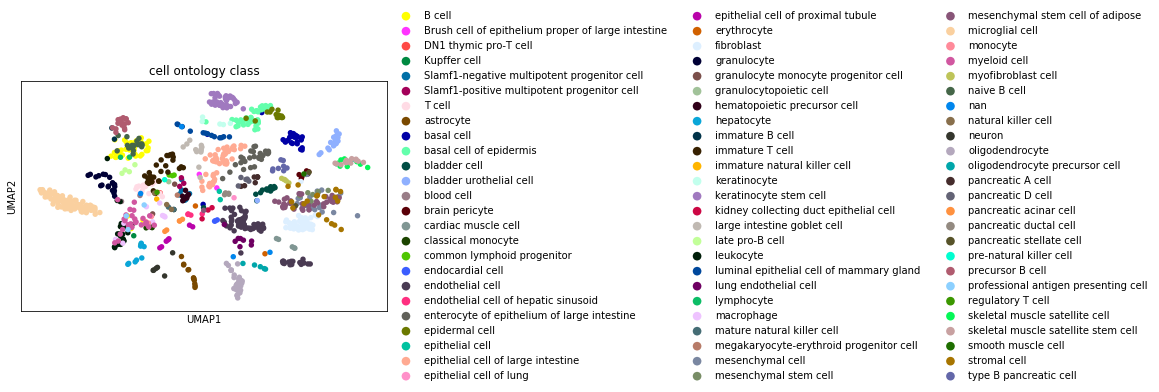

In [36]:
rows = tabula_muris.obs.index.isin(cell_metadata.index)

facs_1000cell_cheating = tabula_muris[rows, :]


sc.pl.umap(facs_1000cell_cheating, 'cell_ontology_class')

## Re-load original, unnormalized count matrices

In [37]:
import scanpy

results_file = '/mnt/data/tabula-muris-facs_1000cell_subset.h5ad'


tm_facs_metadata = pd.read_csv('/mnt/data/czbiohub-tabula-muris/TM_facs_metadata.csv')
tm_facs_metadata = tm_facs_metadata.set_index('cell')

# Replace dots with dashes
index = tm_facs_metadata.index.str.replace('.', '-')
tm_facs_metadata.index = index

tm_facs_data = scanpy.anndata.read_h5ad('/mnt/data/czbiohub-tabula-muris/TM_facs_mat.h5ad')

tm_facs_data.obs.index = index
tm_facs_data.obs = tm_facs_metadata
tm_facs_data

AnnData object with n_obs × n_vars = 53760 × 23433 
    obs: 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation'

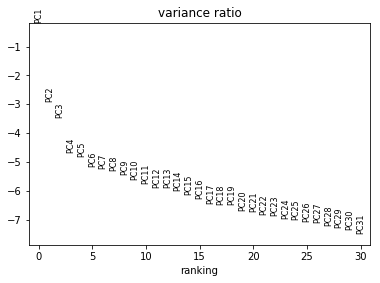

In [38]:
rows = tm_facs_data.obs.index.isin(cell_metadata.index)

facs_1000cell = tm_facs_data[rows, :]
sc.tl.pca(facs_1000cell)

sc.pl.pca_variance_ratio(facs_1000cell, log=True)

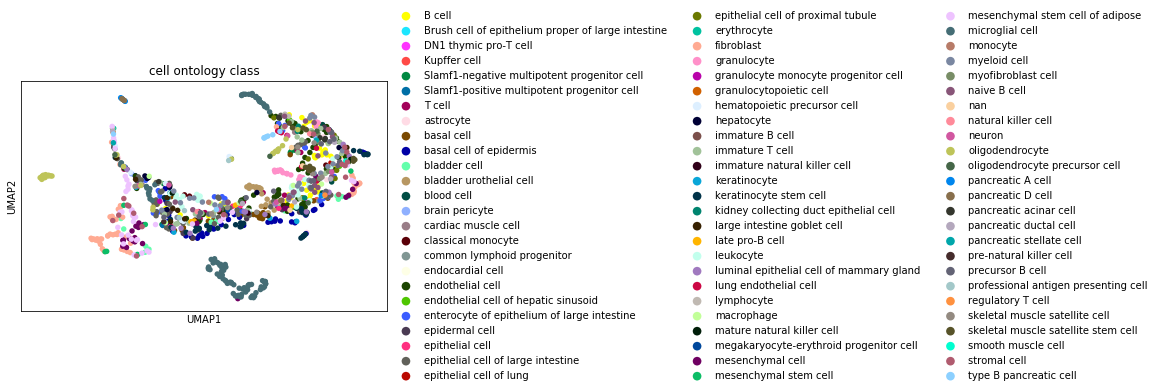

In [63]:
sc.pp.neighbors(facs_1000cell, n_neighbors=5, n_pcs=19)
sc.tl.umap(facs_1000cell)

sc.pl.umap(facs_1000cell, 'cell_ontology_class')

In [49]:
len(facs_1000cell.obs.cell_ontology_class.unique())

75

In [274]:
facs_1000cell.write(results_file)

In [40]:
def embedding_to_df(embedding, metadata):
    embedding_df = pd.DataFrame(embedding, index=metadata.index, columns=['UMAP_1', 'UMAP_2'])

    sample_id_to_cell_ontology_class = pd.DataFrame(metadata[['tissue', 'cell_ontology_class']].values, 
                                                 index=metadata.index, 
                                                    columns=['tissue', 'cell_ontology_class'])
    sample_id_to_cell_ontology_class['mouse_sex'] = sample_id_to_cell_ontology_class.index.map(lambda x: x.split("_")[-1][0])
    sample_id_to_cell_ontology_class.head()

    embedding_metadata = embedding_df.join(sample_id_to_cell_ontology_class)
    embedding_metadata.index.name = 'cell_id'
    return embedding_metadata

def embedding_to_hv_table(embedding_metadata):

    key_dimensions = [('cell_ontology_class', 'Cell ontology class'),
                      ('tissue', "Organ"), ('mouse_sex', 'Mouse Sex')]
    value_dimensions = [("UMAP_1", 'UMAP 1'), ("UMAP_2", "UMAP 2")]
    embedding_hv = hv.Table(embedding_metadata.reset_index(), key_dimensions, value_dimensions)
    return embedding_hv

In [47]:
alignment_umap_df = embedding_to_df(facs_1000cell.obsm['X_umap'], facs_1000cell.obs)
alignment_umap_hv = embedding_to_hv_table(alignment_umap_df)
alignment_umap_hv

:Table   [cell_ontology_class,tissue,mouse_sex]   (UMAP_1,UMAP_2)

### Define a reasonable looking color cycle

In [50]:
cat20c = hv.Cycle("Category20c")
cat20b = hv.Cycle("Category20b")

new_palette = cat20b.values + cat20c.values

color_cycle = hv.Cycle(new_palette)

### Plot interactive version of umap

In [51]:
%%opts Scatter [width=400 height=400 tools=['hover']]
%%opts Scatter (color=color_cycle)

scatters = alignment_umap_hv.to.scatter('UMAP 1', 'UMAP 2', groupby='Cell ontology class')
scatters.overlay('Cell ontology class')


:NdOverlay   [cell_ontology_class]
   :Scatter   [UMAP_1]   (UMAP_2)

## Get median ranks of cells adjacent in gene count space

In [57]:
cell_ids = facs_1000cell.obs.index
facs_1000cell_adjacency_matrix = pd.DataFrame(facs_1000cell.uns['neighbors']['connectivities'].todense(),
                                          index=cell_ids, 
                                          columns=cell_ids)
# adjacency_matrix = 
facs_1000cell_adjacency_matrix.head()

cell_id,A1-B002427-3_39_F-1-1,A1-D041914-3_8_M-1-1,A1-MAA000496-3_10_M-1-1,A1-MAA000549-3_8_M-1-1,A1-MAA001869-3_38_F-1-1,A10-B003281-3_39_F-1-1,A10-MAA000496-3_10_M-1-1,A10-MAA000605-3_10_M-1-1,A11-MAA000611-3_8_M-1-1,A12-B001689-3_38_F-1-1,...,P7-MAA001632-3_56_F-1-1,P8-B000610-3_56_F-1-1,P8-B002010-3_39_F-1-1,P8-MAA000508-3_9_M-1-1,P8-MAA000571-3_9_M-1-1,P9-B001717-3_38_F-1-1,P9-B003281-3_39_F-1-1,P9-MAA000508-3_9_M-1-1,P9-MAA000586-3_8_M-1-1,P9-MAA000937-3_8_M-1-1
cell_id,,,,,,,,,,,,,,,,,,,,,
A1-B002427-3_39_F-1-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1-D041914-3_8_M-1-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1-MAA000496-3_10_M-1-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1-MAA000549-3_8_M-1-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1-MAA001869-3_38_F-1-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
(facs_1000cell_adjacency_matrix > 0).sum().head()

cell_id
A1-B002427-3_39_F-1-1      5
A1-D041914-3_8_M-1-1       6
A1-MAA000496-3_10_M-1-1    5
A1-MAA000549-3_8_M-1-1     5
A1-MAA001869-3_38_F-1-1    6
dtype: int64

In [152]:
def median_neighbor_rank(jaccard_distances, adjacency_matrix, dim='cell_id', 
                         ascending=True):
    
    index = jaccard_distances.coords.indexes.get(dim)
    da_as_df = pd.DataFrame(jaccard_distances.values, index=index, columns=index)
    jaccard_ranks = da_as_df.rank(ascending=ascending)

    median_ranks = jaccard_ranks[adjacency_matrix > 0].median()
    return median_ranks

median_ranks = median_neighbor_rank(ds['trim=false_scaled=1000_dna_ksize=12'],
                                    facs_1000cell_adjacency_matrix)
# sns.distplot(median_ranks)
median_ranks.head()

cell_id
A1-B002427-3_39_F-1-1      238.0
A1-D041914-3_8_M-1-1        40.5
A1-MAA000496-3_10_M-1-1    200.0
A1-MAA000549-3_8_M-1-1     184.0
A1-MAA001869-3_38_F-1-1    147.5
dtype: float64

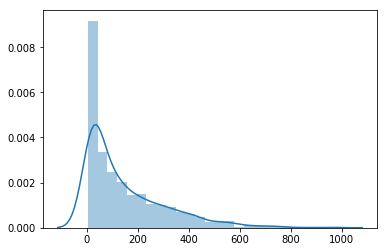

In [153]:
sns.distplot(median_ranks.dropna())

In [154]:
median_ranks_all = ds.apply(median_neighbor_rank, adjacency_matrix=facs_1000cell_adjacency_matrix)
median_ranks_all

<xarray.Dataset>
Dimensions:                              (cell_id: 1000)
Coordinates:
  * cell_id                              (cell_id) object 'A1-B002427-3_39_F-1-1' ...
Data variables:
    trim=false_scaled=1000_dna_ksize=12  (cell_id) float64 238.0 40.5 200.0 ...
    trim=false_scaled=1000_dna_ksize=15  (cell_id) float64 241.0 107.5 268.0 ...
    trim=false_scaled=1000_dna_ksize=18  (cell_id) float64 279.0 241.0 258.0 ...
    trim=false_scaled=1000_dna_ksize=21  (cell_id) float64 199.0 19.5 385.0 ...
    trim=false_scaled=1000_dna_ksize=24  (cell_id) float64 318.0 21.0 321.0 ...
    trim=false_scaled=1000_dna_ksize=27  (cell_id) float64 377.0 39.0 626.0 ...
    trim=false_scaled=1000_dna_ksize=3   (cell_id) float64 499.0 499.0 499.0 ...
    trim=false_scaled=1000_dna_ksize=30  (cell_id) float64 275.0 144.0 320.0 ...
    trim=false_scaled=1000_dna_ksize=33  (cell_id) float64 199.0 125.5 286.0 ...
    trim=false_scaled=1000_dna_ksize=36  (cell_id) float64 180.0 200.0 279.0 ...
    t

In [162]:
median_ranks_df = median_ranks_all.to_dataframe().T.unstack().reset_index()
median_ranks_df = median_ranks_df.rename(
    columns={"level_1": 'experiment_id', 0: 'nn_median_rank'})
median_ranks_df.head()

,cell_id,experiment_id,nn_median_rank
0,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=12,238.0
1,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=15,241.0
2,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=18,279.0
3,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=21,199.0
4,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=24,318.0


In [181]:
median_ranks_metadata = median_ranks_df.join(experiment_metadata, on='experiment_id') 
print(median_ranks_metadata.shape)
median_ranks_metadata.head()

(988000, 7)


,cell_id,experiment_id,nn_median_rank,comparison_sequence,ksize,scaled,trim
0,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=12,238.0,dna,12,1000,True
1,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=15,241.0,dna,15,1000,True
2,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=18,279.0,dna,18,1000,True
3,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=21,199.0,dna,21,1000,True
4,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=24,318.0,dna,24,1000,True


In [182]:
ksize_order = sorted(median_ranks_metadata['ksize'].unique())
ksize_order

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]

In [183]:
scaled_order = sorted(median_ranks_metadata['scaled'].unique())
scaled_order

[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2500,
 3000,
 3500,
 4000,
 4500,
 5000]

In [168]:
median_ranks_metadata.dtypes

cell_id                 object
experiment_id           object
nn_median_rank         float64
comparison_sequence     object
ksize                    int64
scaled                  object
trim                      bool
dtype: object

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


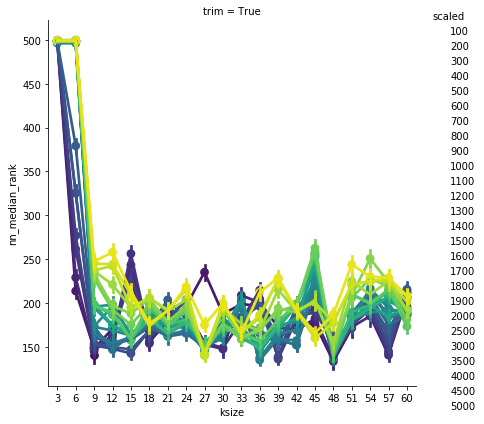

In [193]:
g = sns.FacetGrid(median_ranks_metadata, hue='scaled', col='trim', 
                  size=6, hue_order=scaled_order, palette='viridis')
g = g.map(sns.pointplot, 'ksize', 'nn_median_rank', lowess=True, order=ksize_order)
g = g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/home/ubuntu/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/ubuntu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


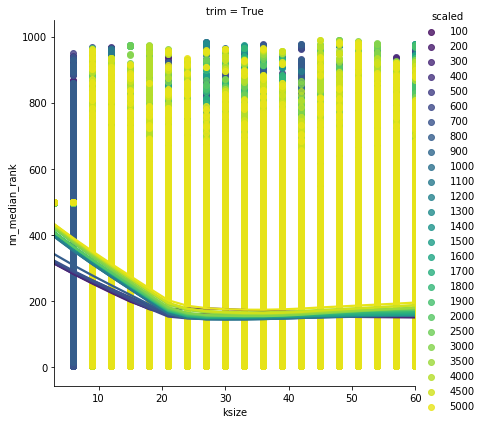

In [289]:
g = sns.FacetGrid(median_ranks_metadata, hue='scaled', col='trim', 
                  height=6, hue_order=scaled_order, palette='viridis')
g.map(sns.regplot, 'ksize', 'nn_median_rank', lowess=True)
g.add_legend()
g.set(xlim=(3, 60))

In [273]:
sns.regplot?

In [192]:
sns.pointplot?

In [243]:
scales = [100, 500, 1000, 2000, 5000]

In [253]:
median_ranks_metadata_subset_scales = median_ranks_metadata.query('scaled in @scales')
median_ranks_metadata_subset_scales = median_ranks_metadata_subset_scales.dropna()
print(median_ranks_metadata_subset_scales.shape)
median_ranks_metadata_subset_scales.head()

(160314, 7)


,cell_id,experiment_id,nn_median_rank,comparison_sequence,ksize,scaled,trim
0,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=12,238.0,dna,12,1000,True
1,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=15,241.0,dna,15,1000,True
2,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=18,279.0,dna,18,1000,True
3,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=21,199.0,dna,21,1000,True
4,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=24,318.0,dna,24,1000,True


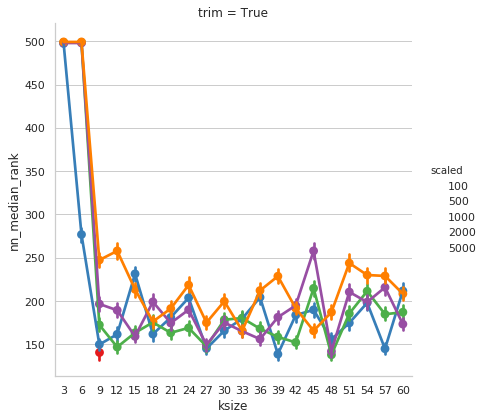

In [324]:
g = sns.FacetGrid(median_ranks_metadata_subset_scales, hue='scaled', col='trim', 
                  height=6, palette='Set1')
g = g.map(sns.pointplot, 'ksize', 'nn_median_rank', lowess=True, order=ksize_order)
g = g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/home/ubuntu/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/ubuntu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


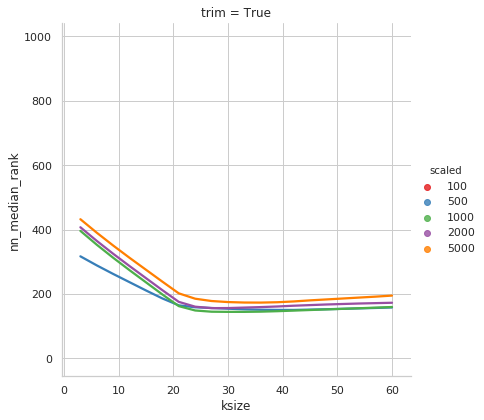

In [323]:
g = sns.FacetGrid(median_ranks_metadata_subset_scales, hue='scaled', col='trim', 
                  height=6, palette='Set1')
g.map(sns.regplot, 'ksize', 'nn_median_rank', lowess=True)
g.add_legend()

# For some reason scatter=False doesn't work so you have to manually remove them
ax = g.axes[0][0]
ax.collections = []

In [306]:
sns.regplot?

/home/ubuntu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/home/ubuntu/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/ubuntu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


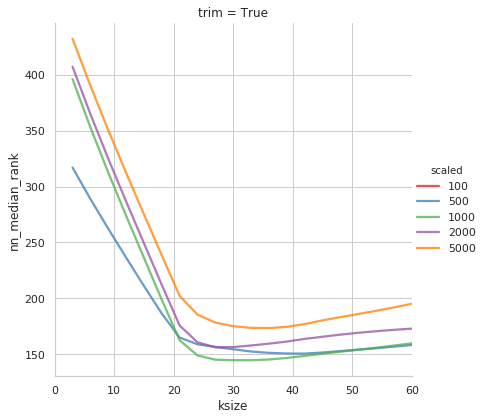

In [317]:
with sns.axes_style('whitegrid'):
    g = sns.FacetGrid(median_ranks_metadata_subset_scales, hue='scaled', col='trim', 
                      height=6, palette='Set1')
    g.map(sns.regplot, 'ksize', 'nn_median_rank', lowess=True, scatter=False, 
          line_kws=dict(alpha=0.75))
    g.add_legend()
    g.set(xlim=(0, 60))

/home/ubuntu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/home/ubuntu/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/ubuntu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


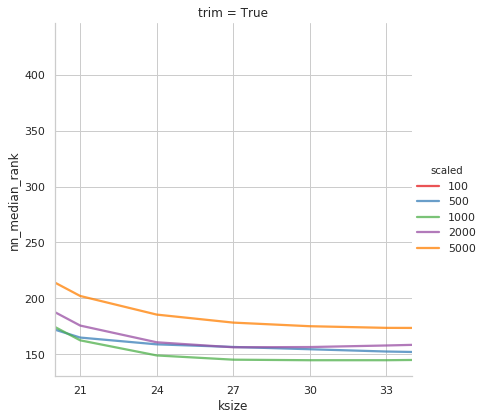

In [322]:
with sns.axes_style('whitegrid'):
    g = sns.FacetGrid(median_ranks_metadata_subset_scales, hue='scaled', col='trim', 
                      height=6, palette='Set1')
    g.map(sns.regplot, 'ksize', 'nn_median_rank', lowess=True, scatter=False, 
          line_kws=dict(alpha=0.75))
    g.add_legend()
    g.set(xlim=(20, 34), xticks=range(21, 35, 3))


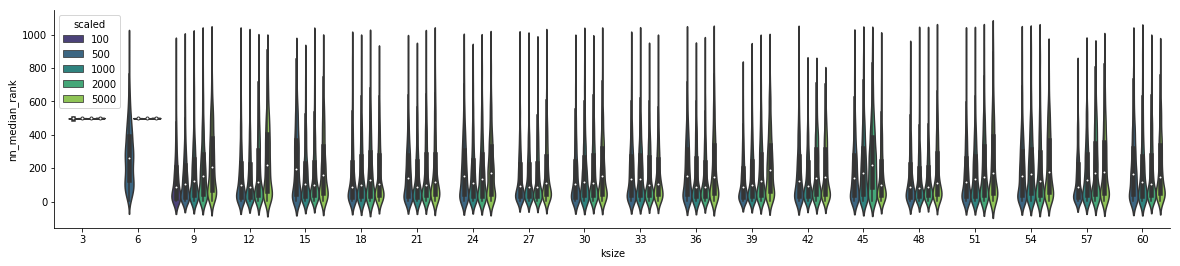

In [256]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.violinplot('ksize', 'nn_median_rank', data=median_ranks_metadata_subset_scales, 
               hue='scaled', palette='viridis', scale='width')
sns.despine()

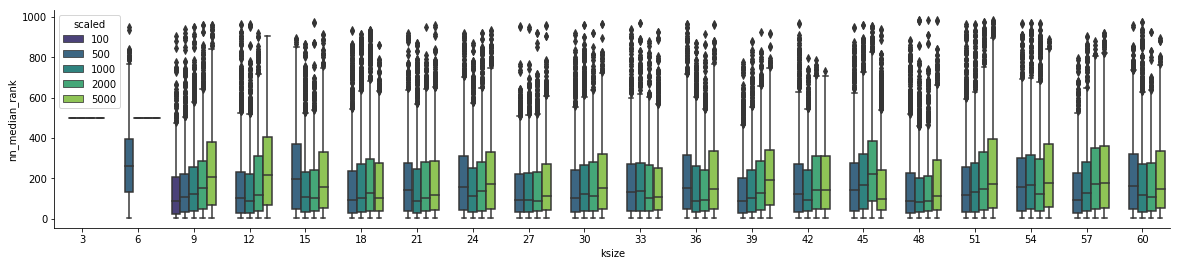

In [257]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.boxplot('ksize', 'nn_median_rank', data=median_ranks_metadata_subset_scales, 
               hue='scaled', palette='viridis')
sns.despine()

In [258]:
# g = sns.FacetGrid(median_ranks_metadata_subset, hue='scaled', col='trim', 
# #                   row='scaled',
#                   height=6, palette='viridis', aspect=2)
# g.map(sns.boxplot, 'ksize', 'nn_median_rank')
# g.add_legend()

In [259]:
# g = sns.FacetGrid(median_ranks_metadata_subset, hue='scaled', 
#                   row='ksize', sharex=True, sharey=True,
#                   height=1, palette='viridis', aspect=2)
# g.map(sns.distplot, 'nn_median_rank', kde=False)
# g.add_legend()

In [260]:
ksizes = list(range(21, 34, 3))
ksizes

[21, 24, 27, 30, 33]

In [309]:
median_ranks_metadata_subset_ksizes = median_ranks_metadata_subset_scales.query('ksize in @ksizes')
median_ranks_metadata_subset_ksizes = median_ranks_metadata_subset_ksizes.dropna()
print(median_ranks_metadata_subset_ksizes.shape)
median_ranks_metadata_subset_ksizes.head()

(39830, 7)


,cell_id,experiment_id,nn_median_rank,comparison_sequence,ksize,scaled,trim
3,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=21,199.0,dna,21,1000,True
4,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=24,318.0,dna,24,1000,True
5,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=27,377.0,dna,27,1000,True
7,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=30,275.0,dna,30,1000,True
8,A1-B002427-3_39_F-1-1,trim=false_scaled=1000_dna_ksize=33,199.0,dna,33,1000,True


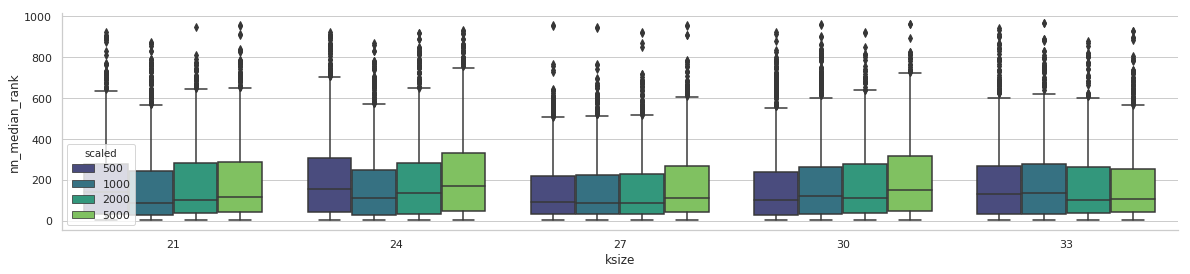

In [310]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.boxplot('ksize', 'nn_median_rank', data=median_ranks_metadata_subset_ksizes, 
               hue='scaled', palette='viridis')
sns.despine()

### Plot ksize as hue

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


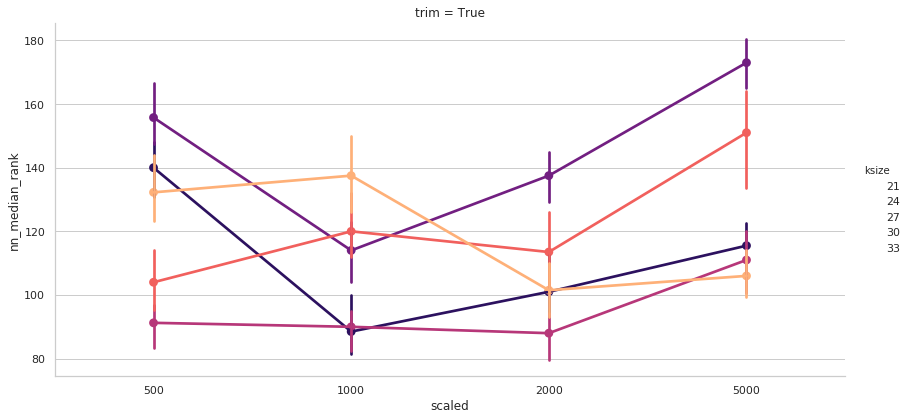

In [311]:
g = sns.FacetGrid(median_ranks_metadata_subset_ksizes, hue='ksize', col='trim', 
                  height=6, palette='magma', aspect=2)
g = g.map(sns.pointplot, 'scaled', 'nn_median_rank', estimator=np.median)
g = g.add_legend()

In [312]:
from scipy import stats

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


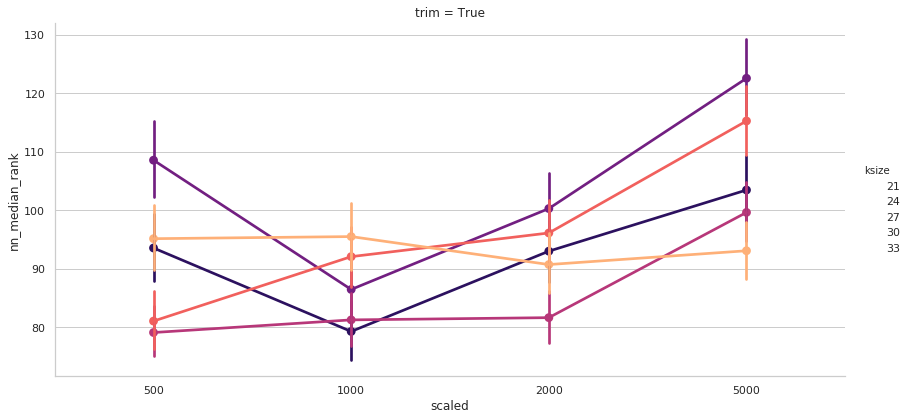

In [313]:
g = sns.FacetGrid(median_ranks_metadata_subset_ksizes, hue='ksize', col='trim', 
                  height=6, palette='magma', aspect=2)
g = g.map(sns.pointplot, 'scaled', 'nn_median_rank', estimator=stats.gmean)
g = g.add_legend()

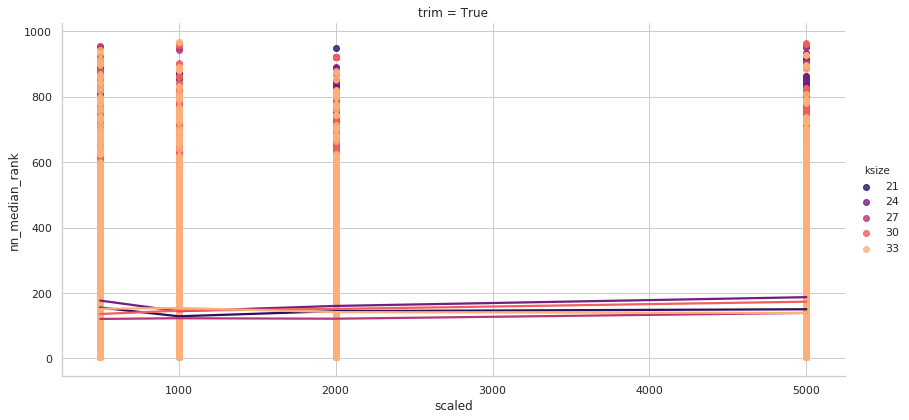

In [314]:
g = sns.FacetGrid(median_ranks_metadata_subset_ksizes, hue='ksize', col='trim', 
                  height=6, palette='magma', aspect=2)
g = g.map(sns.regplot, 'scaled', 'nn_median_rank', lowess=True)
g = g.add_legend()

Turn scatter off

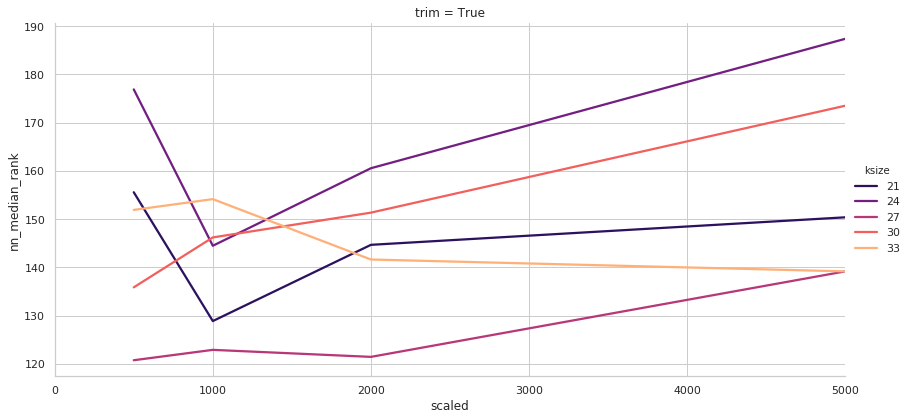

In [315]:
g = sns.FacetGrid(median_ranks_metadata_subset_ksizes, hue='ksize', col='trim', 
                  height=6, palette='magma', aspect=2)
g = g.map(sns.regplot, 'scaled', 'nn_median_rank', lowess=True, scatter=False)
g = g.add_legend()
g.set(xlim=(0, 5000))

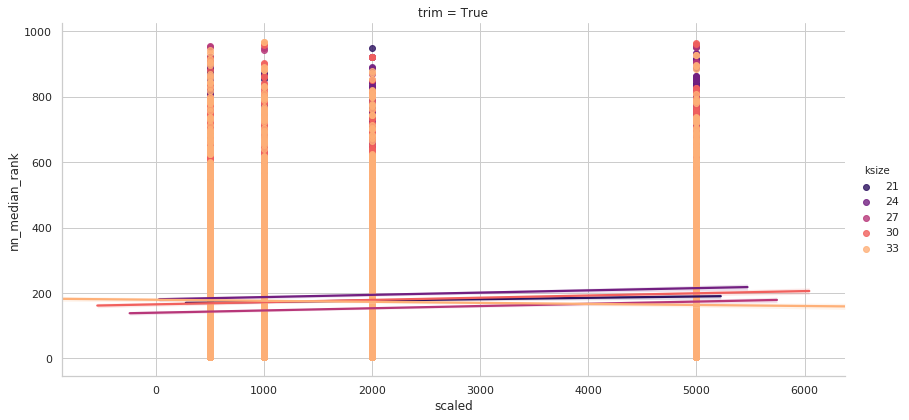

In [316]:
g = sns.FacetGrid(median_ranks_metadata_subset_ksizes, hue='ksize', col='trim', 
                  height=6, palette='magma', aspect=2)
g = g.map(sns.regplot, 'scaled', 'nn_median_rank')
g = g.add_legend()